In [70]:
import urllib
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import fiona

In [72]:
import pandas as pd 
import matplotlib.pyplot as plt 
from mpl_toolkits.basemap import Basemap

class MyBasemap(Basemap):     
    def printcountries(self, d=3, max_len=12):
        data = pd.io.parsers.read_csv("http://opengeocode.org/cude/download.php?file=/home/fashions/public_html/opengeocode.org/download/cow.txt", 
                                      sep=";", skiprows=28 )
        data = data[(data.latitude > self.llcrnrlat+d) & (data.latitude < self.urcrnrlat-d) & (data.longitude > self.llcrnrlon+d) & (data.longitude < self.urcrnrlon-d)]
        for ix, country in data.iterrows():                            
                plt.text(*self(country.longitude, country.latitude), s=country.BGN_name[:max_len]) 

In [73]:
path= "https://apis.datos.gob.ar/georef/api/provincias?&formato=csv"

animal_data = pd.DataFrame.from_csv(path)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
import pandas as pd 
import matplotlib.pyplot as plt 
from mpl_toolkits.basemap import Basemap


path =  "https://apis.datos.gob.ar/georef/api/provincias?&formato=csv"

animal_data = pd.DataFrame.from_csv(path)
animal_data.columns = ["provincia", "gps_lat", "gps_long"]

# data cleaning omitted for clarity 

params = {
        'projection':'merc', 
        'lat_0':animal_data.gps_lat.mean(), 
        'lon_0':animal_data.gps_long.mean(), 
        'resolution':'h', 
        'area_thresh':0.1, 
        'llcrnrlon':animal_data.gps_long.min()-10, 
        'llcrnrlat':animal_data.gps_lat.min()-10, 
        'urcrnrlon':animal_data.gps_long.max()+10, 
        'urcrnrlat':animal_data.gps_lat.max()+10
}
map = Basemap(**params)

map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()          

y = map(animal_data.gps_long.values, animal_data.gps_lat.values)

map.plot(y, 'b-', linewidth=1)    
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


ValueError: llcrnrlat must be between -90.000000 and 90.000000 degrees

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()


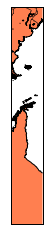

In [146]:

map= Basemap (
        projection="merc", 
        lat_0=animal_data.gps_lat.mean(), 
        lon_0=animal_data.gps_long.mean(),
        resolution='h', 
        area_thresh=0.1, 
        llcrnrlon=animal_data.gps_long.min(), 
        llcrnrlat=animal_data.gps_lat.min(), 
        urcrnrlon=animal_data.gps_long.max(), 
        urcrnrlat=animal_data.gps_lat.max(),
)


map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()          

y = map(animal_data.gps_long.values, animal_data.gps_lat.values)

map.plot(y, 'b-', linewidth=1)    
plt.show()

In [141]:
animal_data.gps_lat.min()

-82.52151781220999

In [ ]:
Basemap(
    llcrnrlon=None,
    llcrnrlat=None,
    urcrnrlon=None,
    urcrnrlat=None,
    llcrnrx=None,
    llcrnry=None,
    urcrnrx=None,
    urcrnry=None,
    width=None,
    height=None,
    projection='cyl',
    resolution='c',
    area_thresh=None,
    rsphere=6370997.0,
    ellps=None,
    lat_ts=None,
    lat_1=None,
    lat_2=None,
    lat_0=None,
    lon_0=None,
    lon_1=None,
    lon_2=None,
    o_lon_p=None,
    o_lat_p=None,
    k_0=None,
    no_rot=False,
    suppress_ticks=True,
    satellite_height=35786000,
    boundinglat=None,
    fix_aspect=True,
    anchor='C',
    celestial=False,
    round=False,
    epsg=None,
    ax=None,
)